In [3]:
# Import libararies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input, MaxPooling2D
from tensorflow.keras.models import Model
from mpl_toolkits.mplot3d import Axes3D

In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7

# Create a random dataset with a UDF

In [4]:
# Simulate a dataset
def generate_data(num_samples):
    """ Generate dummy 'images' and 'depth maps' for demonstration. """
    images = np.random.rand(num_samples, 128, 128, 3)  # Random images
    depth_maps = np.random.rand(num_samples, 128, 128, 1)  # Random depth maps
    return images, depth_maps

In [5]:
df = generate_data(20)

# Basic CNN model in a UDF

In [6]:
def create_model():
    input_img = Input(shape=(128, 128, 3))
    # Encoder: downsampling
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)  # Downsample to 64x64
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # Downsample to 32x32
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # Downsample to 16x16

    # Decoder: upsampling
    x = UpSampling2D((2, 2))(x)  # Upsample to 32x32
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # Upsample to 64x64
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # Upsample to 128x128
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    model = Model(input_img, x)
    return model

# Model Training and Dataset creation with 1000 samples

In [7]:
# Train the model
num_samples = 1000
images, depth_maps = generate_data(num_samples)
model = create_model()
model.compile(optimizer='adam', loss='mse')
model.fit(images, depth_maps, epochs=10, batch_size=20)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - loss: 0.0835
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 0.0833
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - loss: 0.0833
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - loss: 0.0833
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - loss: 0.0833
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 0.0833
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - loss: 0.0833
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 0.0833
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - loss: 0.0833
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 0.0833


# Test prediction model

In [8]:
# Predict a depth map
test_image = np.random.rand(1, 128, 128, 3)
predicted_depth = model.predict(test_image)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


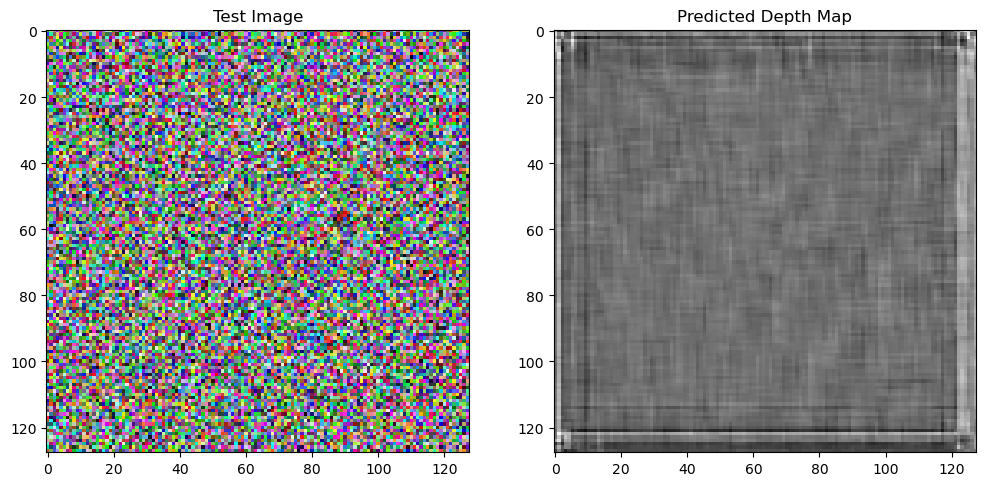

In [9]:
# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Test Image')
plt.imshow(test_image[0])
plt.subplot(1, 2, 2)
plt.title('Predicted Depth Map')
plt.imshow(predicted_depth[:,:,0], cmap='gray')
plt.show()

# Test Random Image for the Model

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

In [11]:
# Load and preprocess an image
def preprocess_image(image_path, target_size=(128, 128)):
    """Resize the loaded image to the target parametres of 128 height and Width ."""
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)  # Convert the image to an array
    img_array = img_array / 255.0  # Normalize the image array
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    return img_array

In [13]:
# Path to your image
image_path = r"C:\Users\User\Downloads\BlurryDavid.jpg"

# Preprocess the image
test_image = preprocess_image(image_path)

# Predict the depth map
predicted_depth = model.predict(test_image)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


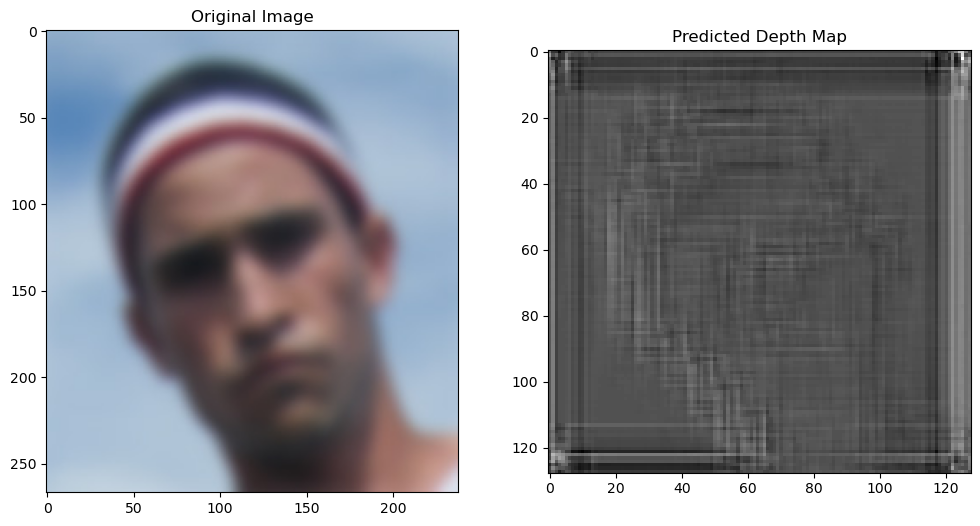

In [14]:
# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(load_img(image_path))  # Show the original image
plt.subplot(1, 2, 2)
plt.title('Predicted Depth Map')
plt.imshow(predicted_depth[:,:,0], cmap='gray')
plt.show()

# 3D image conversion

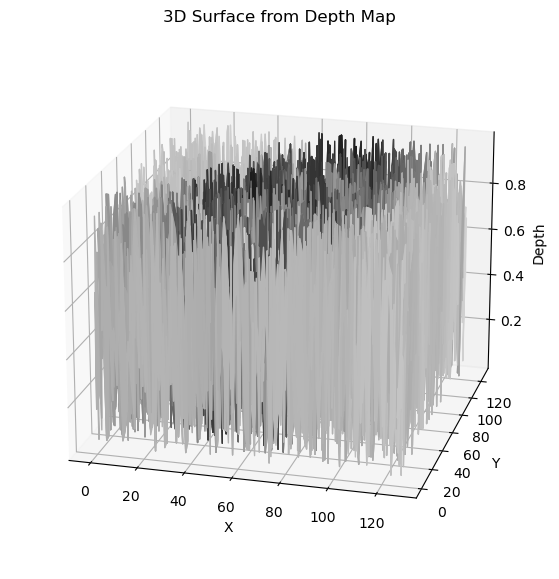

In [16]:
# Load and preprocess an image
image_path = r"C:\Users\User\Downloads\BlurryDavid.jpg"
original_img = load_img(image_path, target_size=(128, 128))
original_img = img_to_array(original_img) / 255.0

# Assume you have a predicted depth map stored in `predicted_depth`
# For demonstration, let's assume a random depth map for now
predicted_depth = np.random.rand(128, 128, 1)

# Create a mesh grid
x = np.linspace(0, 127, 128)
y = np.linspace(0, 127, 128)
x, y = np.meshgrid(x, y)

# Extract the depth values
z = predicted_depth[:, :, 0]

# Prepare colors for each point in the mesh
colors = plt.cm.gray(original_img.mean(axis=2))  # Use mean to get grayscale values

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, facecolors=colors, shade=False)

# Set plot display parameters
ax.set_title('3D Surface from Depth Map')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Depth')
ax.view_init(elev=20, azim=-75)  # Adjust viewing angle for better perception

plt.show()

# 3D Image Conversion

In [17]:
pip install open3d



  Obtaining dependency information for open3d from https://files.pythonhosted.org/packages/43/ee/1c0f25a57b43849fb9f1e773e5c065aa3363b49313bdbdfb7b35337bbab3/open3d-0.18.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for dash>=2.6.0 from https://files.pythonhosted.org/packages/b0/68/781d0026a100106b64e4501c76621dfcd0d3c29a546094fcffaa73037a74/dash-2.16.1-py3-none-any.whl.metadata
  Obtaining dependency information for configargparse from https://files.pythonhosted.org/packages/6f/b3/b4ac838711fd74a2b4e6f746703cf9dd2cf5462d17dac07e349234e21b97/ConfigArgParse-1.7-py3-none-any.whl.metadata
  Obtaining dependency information for dash-html-components==2.0.0 from https://files.pythonhosted.org/packages/75/65/1b16b853844ef59b2742a7de74a598f376ac0ab581f0dcc34db294e5c90e/dash_html_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-core-components==2.0.0 from https://files.pythonhosted.org/packages/00/9e/a29f726e84e531a36d56cff187e61d

In [39]:
import open3d as o3d
import numpy as np
from PIL import Image

In [40]:
# Load the image and the depth map
image_path = r"C:\Users\User\Downloads\BlurryDavid.jpg"
depth_map_path = r"C:\Users\User\Downloads\download (9).jpg"

In [56]:
color_raw = Image.open(image_path)
depth_raw = Image.open(depth_map_path)

# Assuming the depth map is a single-channel image where pixel values represent depth
color_raw = color_raw.resize((640, 480), Image.LANCZOS)
depth_raw = depth_raw.resize((640, 480), Image.LANCZOS)

color = np.asarray(color_raw, dtype=np.float64) / 255.0  # Normalize colors directly
depth = np.asarray(depth_raw, dtype=np.float64)

In [58]:
# Normalize depth and ensure it's single-channel
if depth.ndim == 3 and depth.shape[2] == 3:  # Check if depth is incorrectly a three-channel image
    depth = depth[:, :, 0]  # Use only one channel if it's a color image, normally grayscale image is expected

depth = depth / 255.0 * 10  # Scale the depth to reasonable real-world values

# Generate meshgrid for pixel coordinates
u = np.arange(color.shape[1])
v = np.arange(color.shape[0])
u, v = np.meshgrid(u, v)

# Convert pixel coordinates (u, v, depth) to (x, y, z)
x = (u - color.shape[1] / 2) * depth / 1000
y = (v - color.shape[0] / 2) * depth / 1000
z = depth

In [62]:
# Stack the coordinates into a single array for points
points = np.stack((x, y, z), axis=-1)

# Mask to filter out points with zero depth
valid_mask = depth > 0
points = points[valid_mask]
colors = color[valid_mask]

# Create a point cloud object
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points.reshape(-1, 3))  # Reshape for Open3D
pcd.colors = o3d.utility.Vector3dVector(colors.reshape(-1, 3))

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd], window_name="3D Reconstruction", width=800, height=600)